## Understanding and Implementing K-Means and DBSCAN Algorithms
### Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
### Datasets :
#### Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
### Implementing Clustering Algorithms:
* Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.
* Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
* Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.
### Cluster Analysis and Interpretation:
* Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.
### Visualization:
- Visualize the clustering results using scatter plots or other suitable visualization techniques.
- Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
### Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [28]:
#### Data Preprocessing:
# 1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

import pandas as pd
df=pd.read_excel("C:\\Users\\moulika\\Downloads\\EastWestAirlines.xlsx")
df


,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [29]:
import pandas as pd
df=pd.read_excel("C:\\Users\\moulika\\Downloads\\EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset from sheet named "data"

df=pd.read_excel("C:\\Users\\moulika\\Downloads\\EastWestAirlines.xlsx",sheet_name="data")
print("Dataset loaded successfully!")
print(df.head())

# 2. Handle Missing Values

print("\nMissing values before:")
print(df.isnull().sum())

# Fill numeric missing values with median
df = df.fillna(df.median(numeric_only=True))

# Optionally drop rows with any remaining missing values
#df = df.dropna()

print("\nMissing values after:")
print(df.isnull().sum())

# 3. Outlier Removal using IQR

def remove_outliers_iqr(data):
    df_clean = data.copy()
    numeric_cols = df_clean.select_dtypes(include=np.number).columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    return df_clean

df_no_outliers = remove_outliers_iqr(df)

print("\nShape after removing outliers:", df_no_outliers.shape)

# 4. Scaling the Features

scaler = StandardScaler()

numeric_cols = df_no_outliers.select_dtypes(include=np.number).columns

df_scaled = df_no_outliers.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_no_outliers[numeric_cols])

print("\nScaled dataset preview:")
print(df_scaled.head())


# df_scaled is now ready for clustering (K-Means, DBSCAN, etc.)

Dataset loaded successfully!
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  

Missing values before:
ID# 

Shape of dataset: (3999, 12)

Column names: ['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award?']

Data types:
 ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

Summary statistics:
                ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e

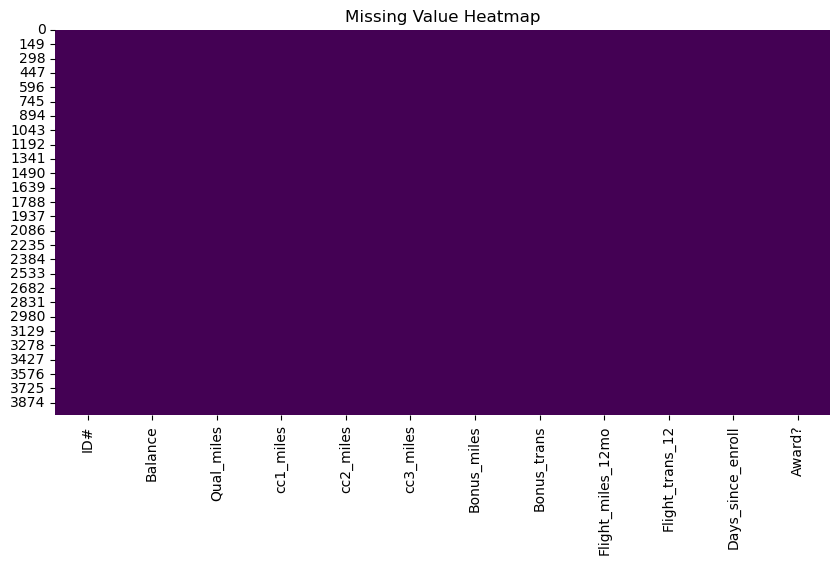


Missing values per column:
 ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


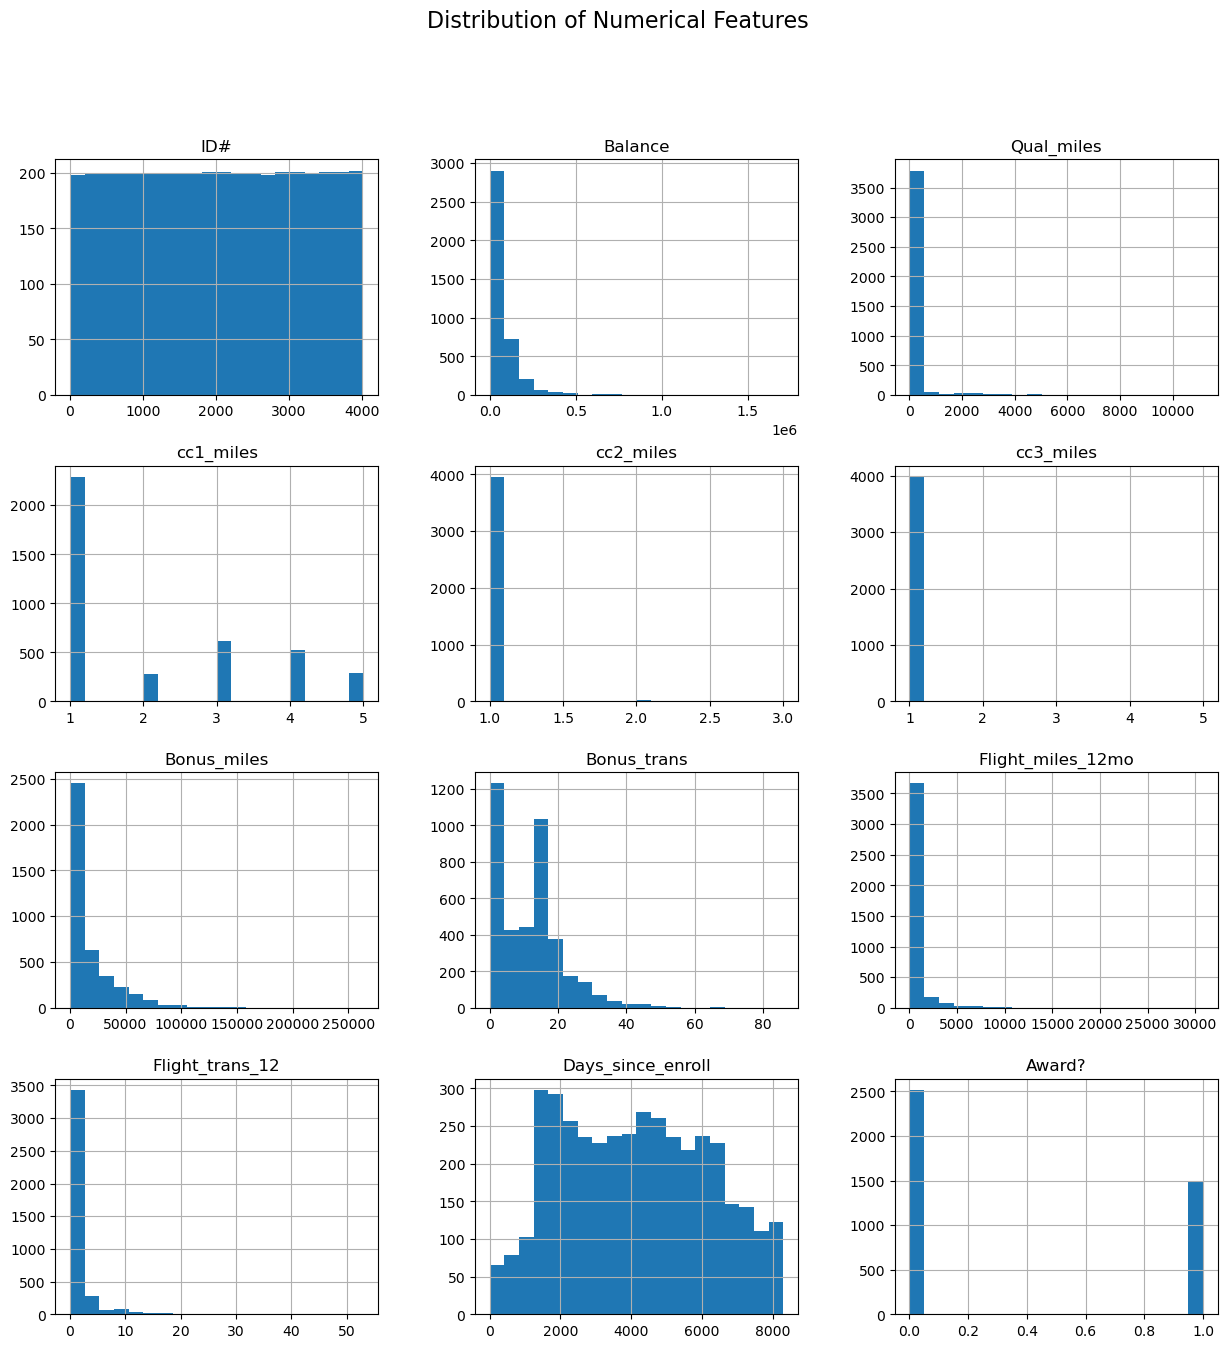

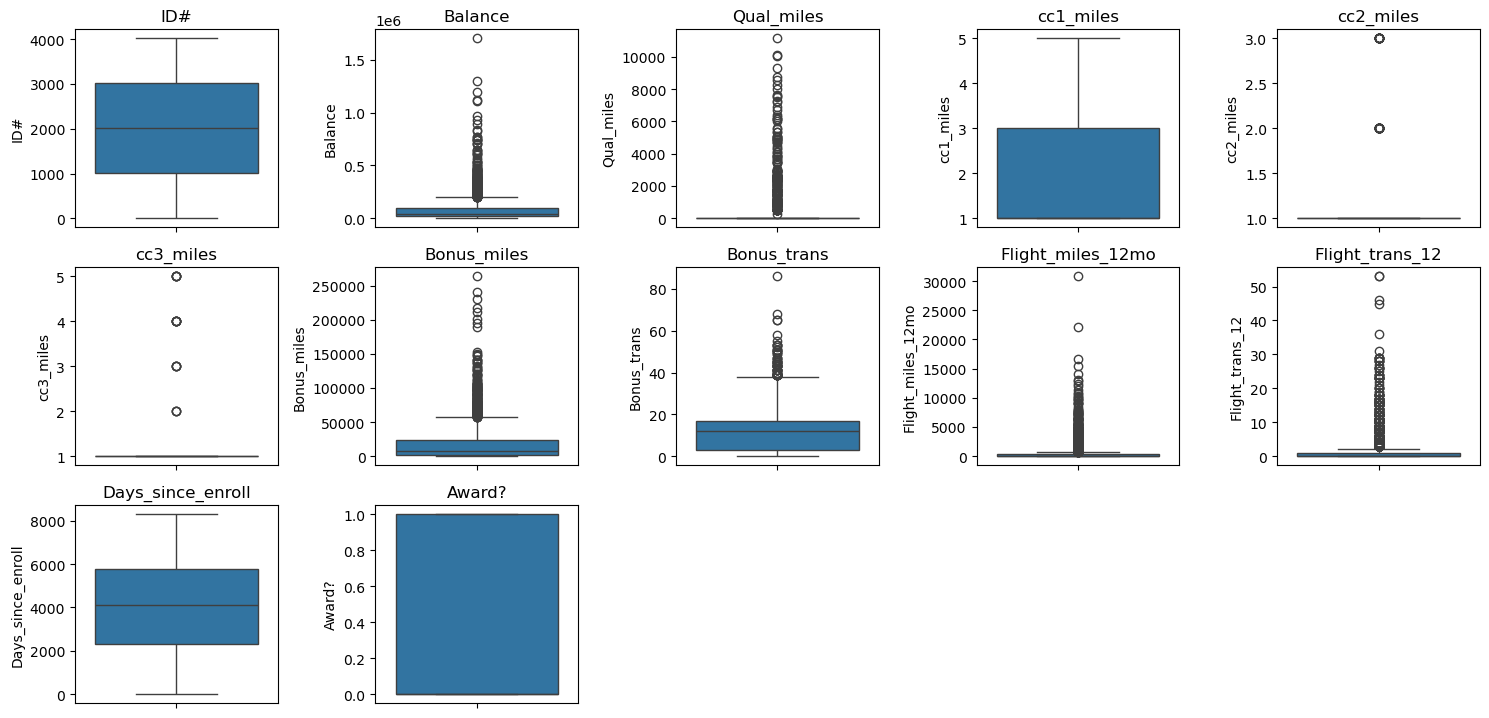

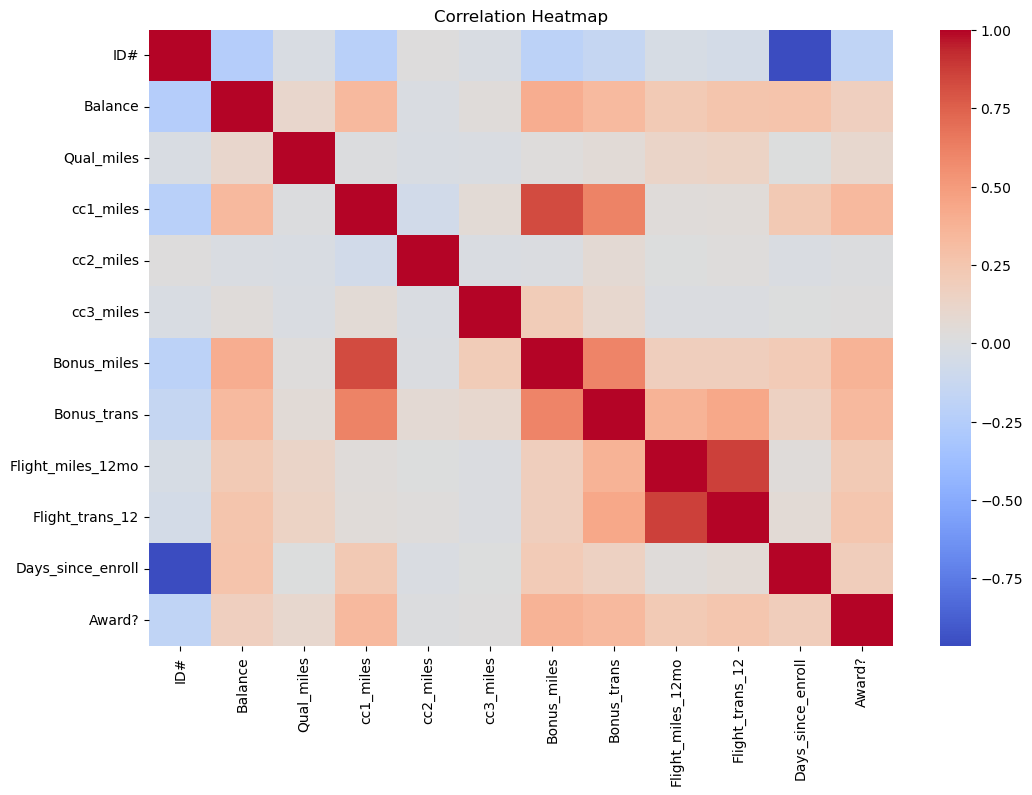

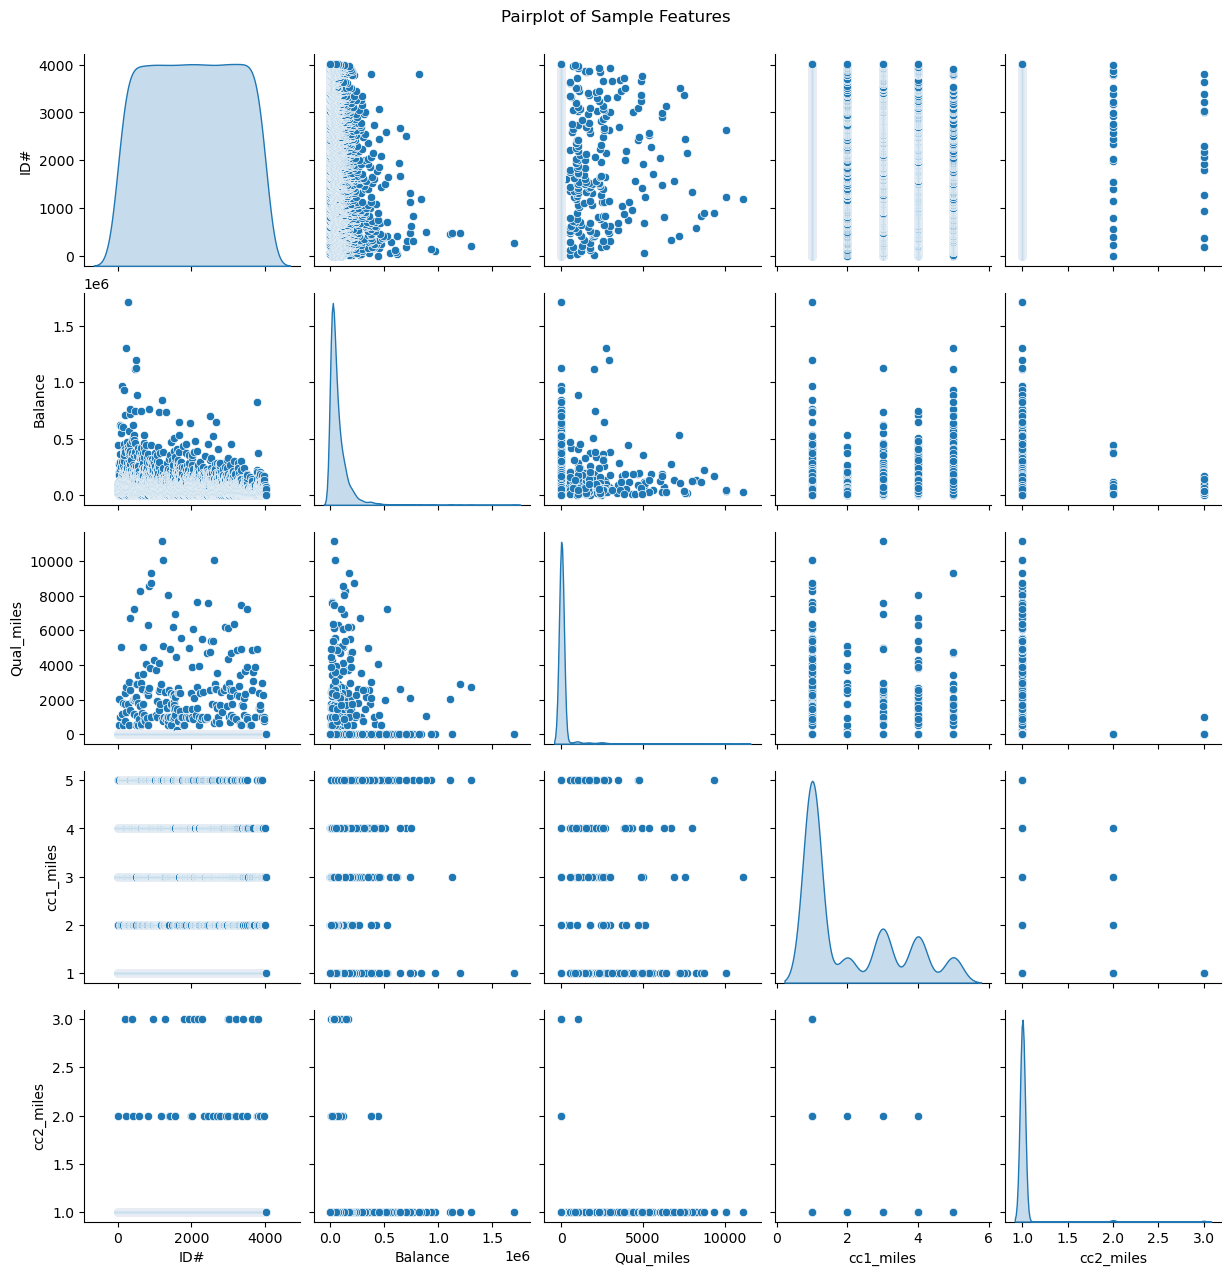

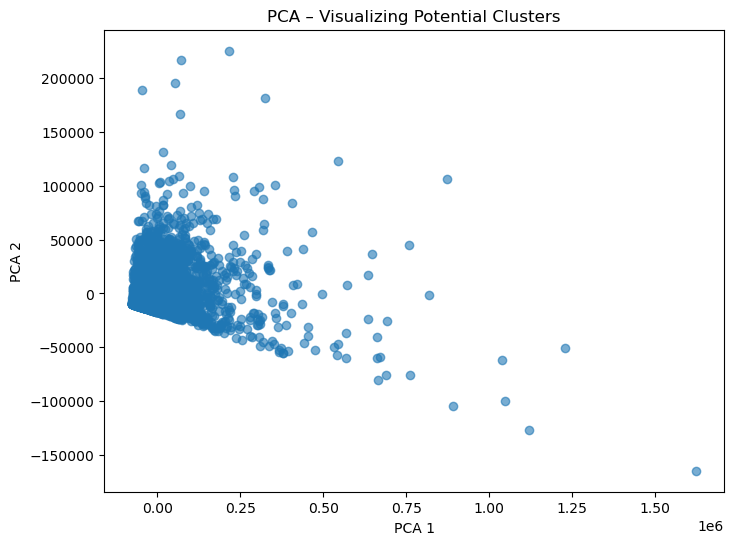

In [32]:
# 2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load dataset 

df=pd.read_excel("C:\\Users\\moulika\\Downloads\\EastWestAirlines.xlsx",sheet_name="data")

# 1. Basic Overview

print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())

# 2. Missing Values

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

print("\nMissing values per column:\n", df.isnull().sum())

# 3. Univariate Analysis : Histograms

numeric_cols = df.select_dtypes(include=np.number).columns

df[numeric_cols].hist(bins=20, figsize=(15,15))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# 4. Outlier Detection : Boxplots

plt.figure(figsize=(15,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 5. Correlation Analysis

plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 6. Pairplot (to identify natural clusters)
#    Use only a few columns to avoid overload

sample_cols = numeric_cols[:5]

sns.pairplot(df[sample_cols], diag_kind='kde')
plt.suptitle("Pairplot of Sample Features", y=1.02)
plt.show()

# 7. PCA Visualization (2D projection)

df_numeric = df[numeric_cols].fillna(df[numeric_cols].median())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_numeric)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA – Visualizing Potential Clusters")
plt.show()

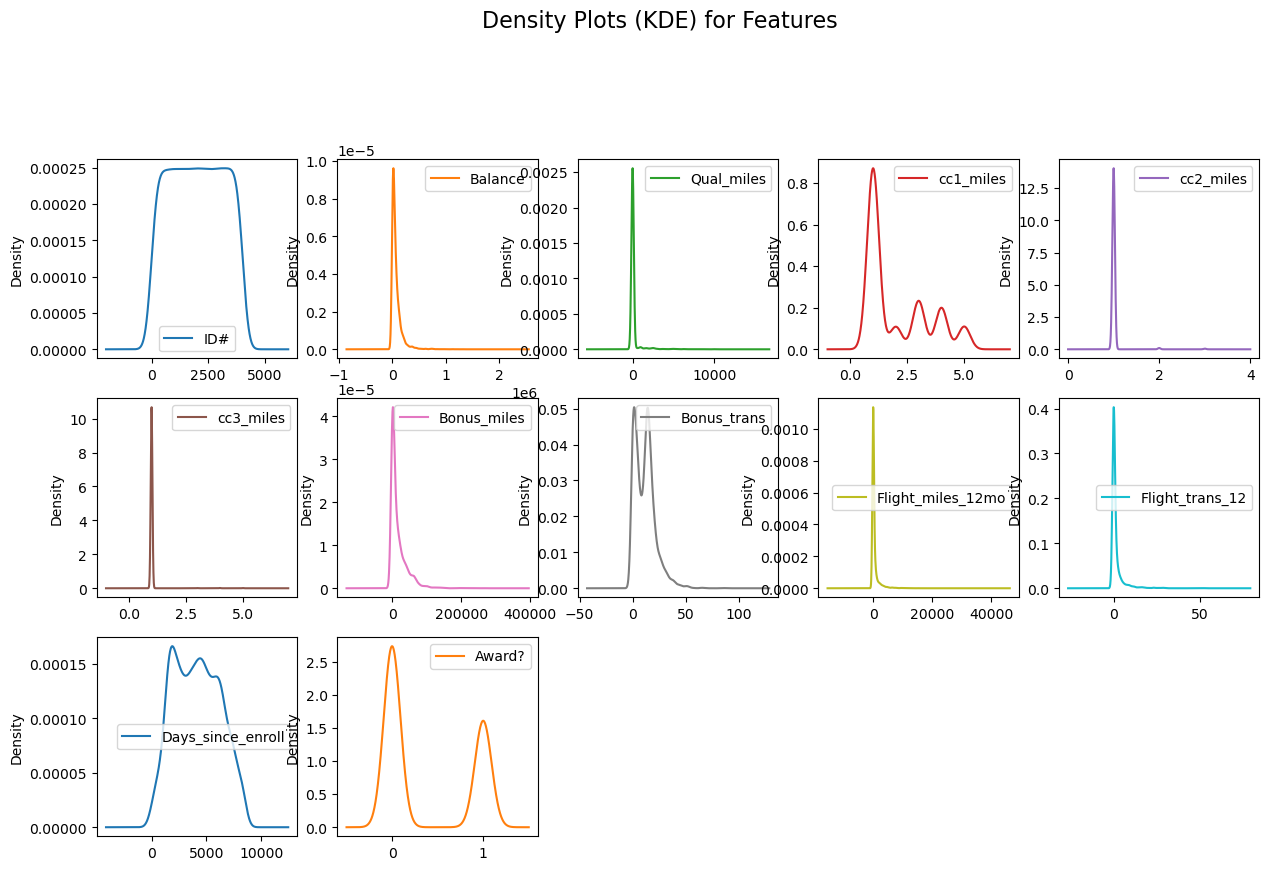

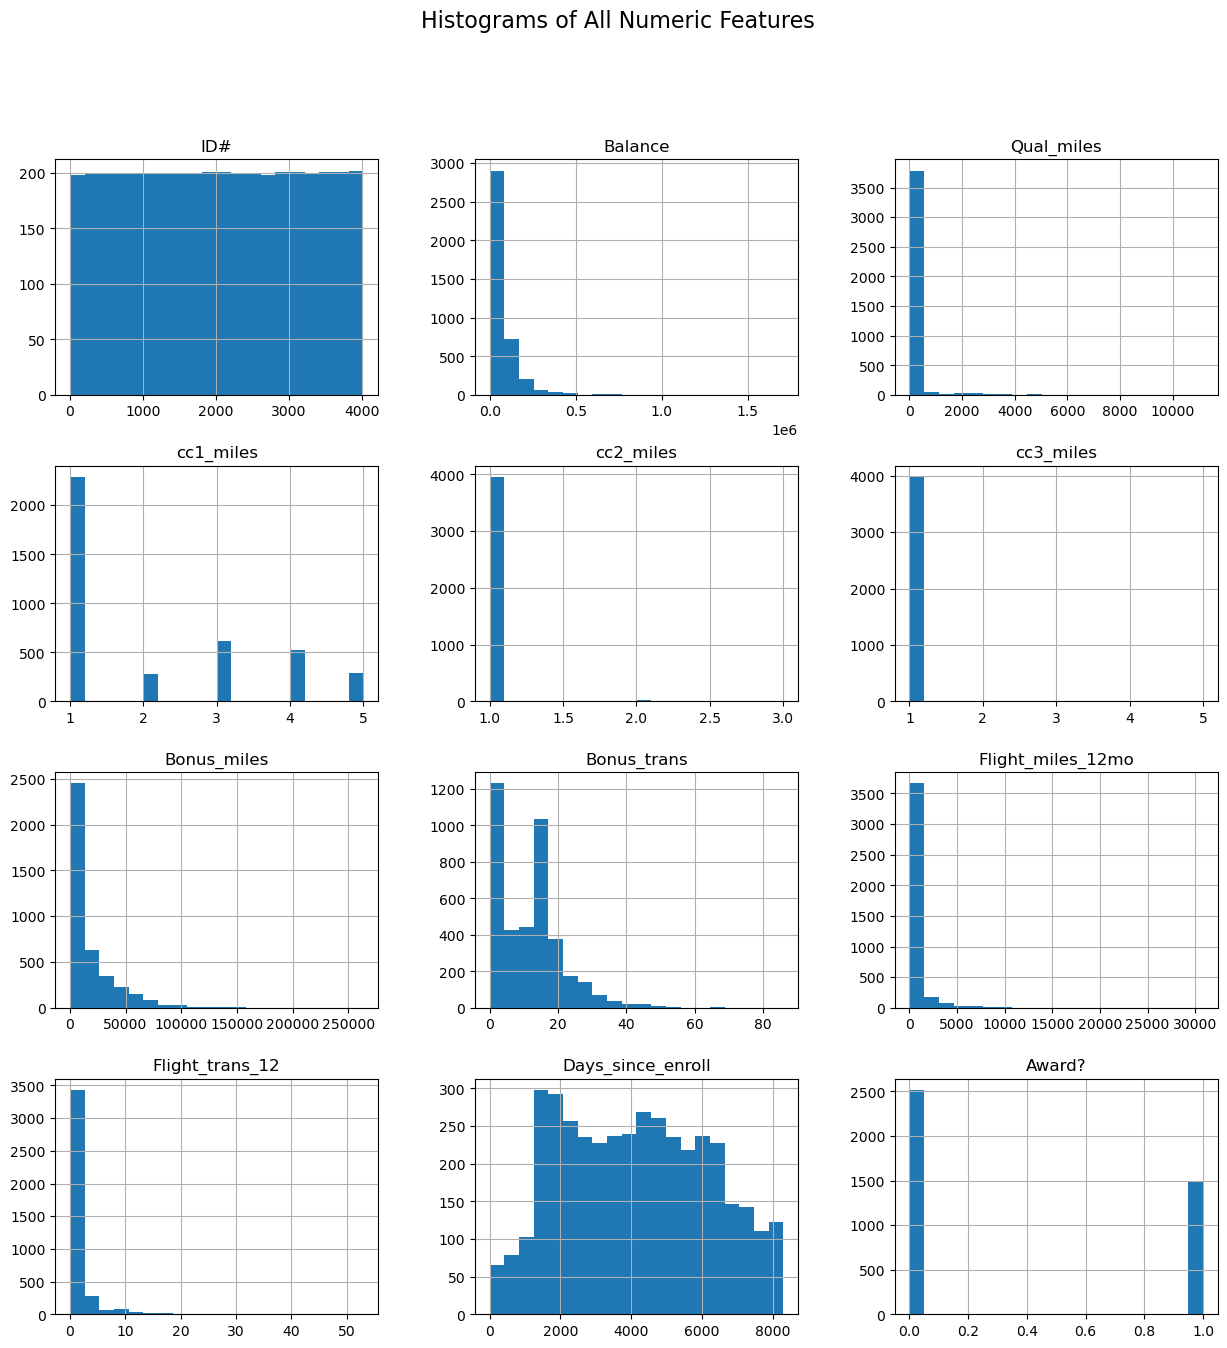

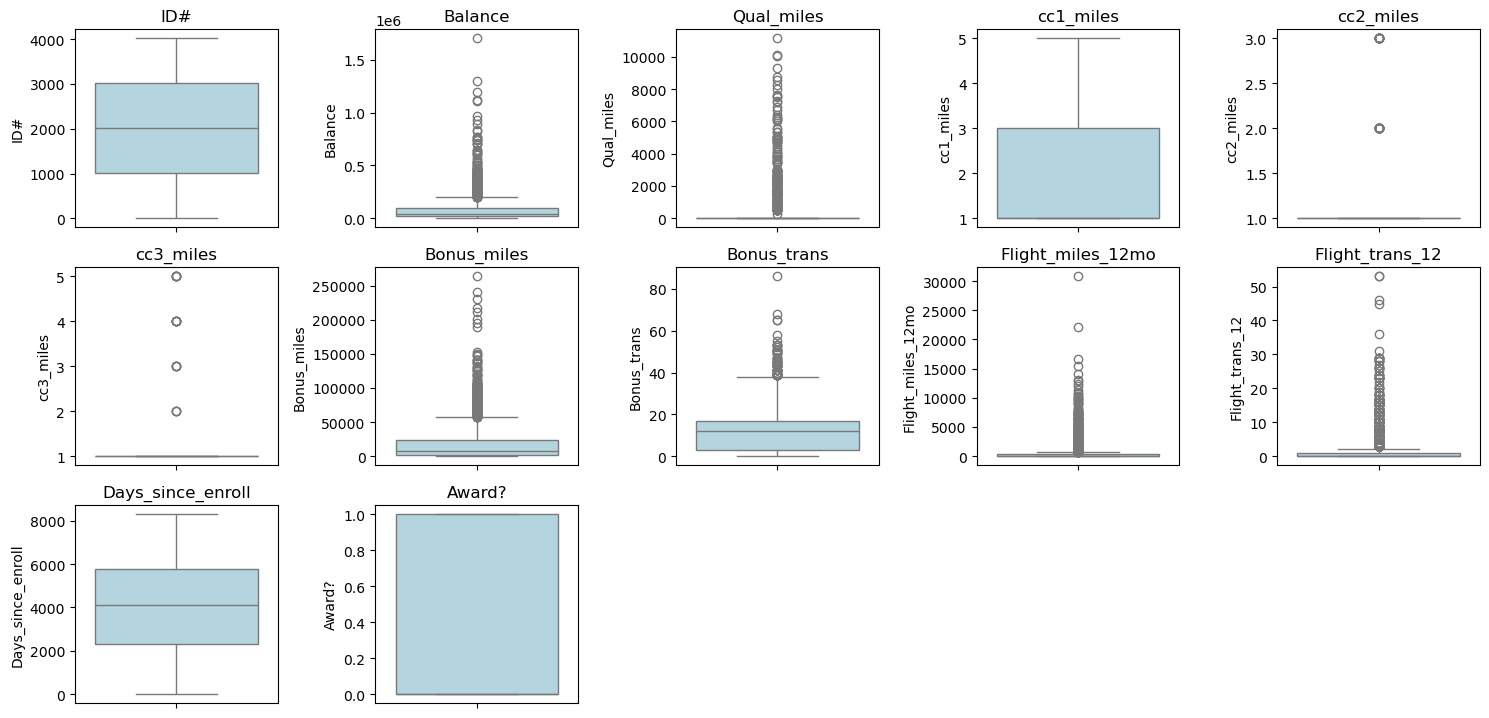

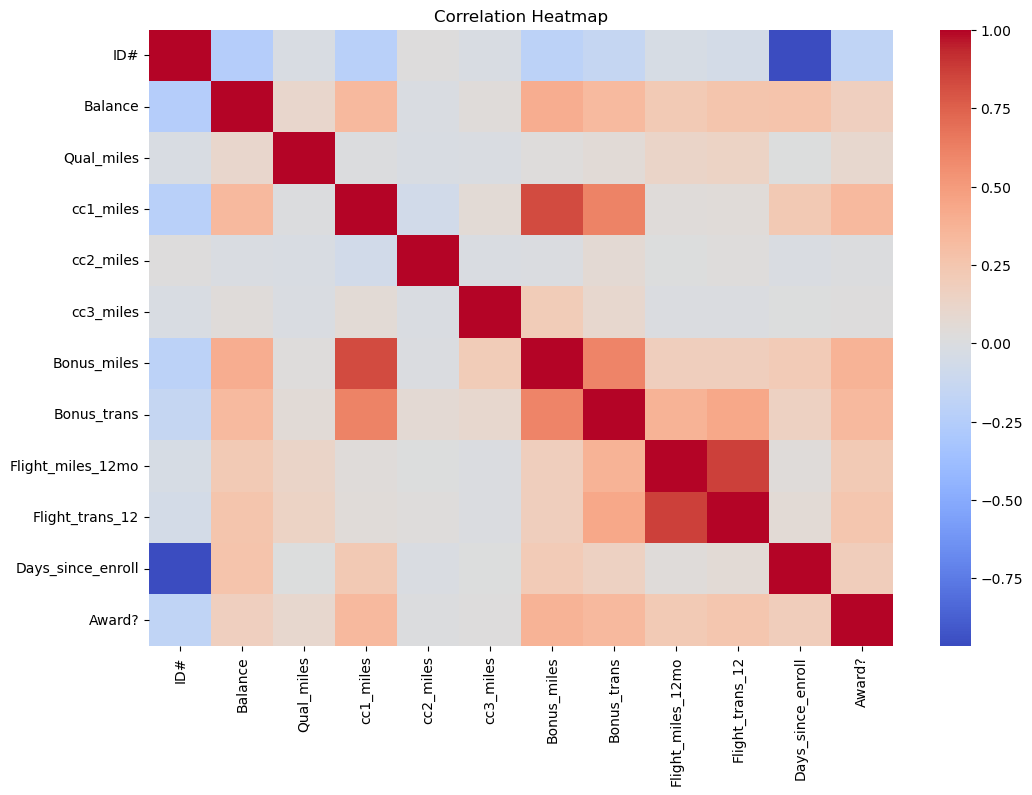

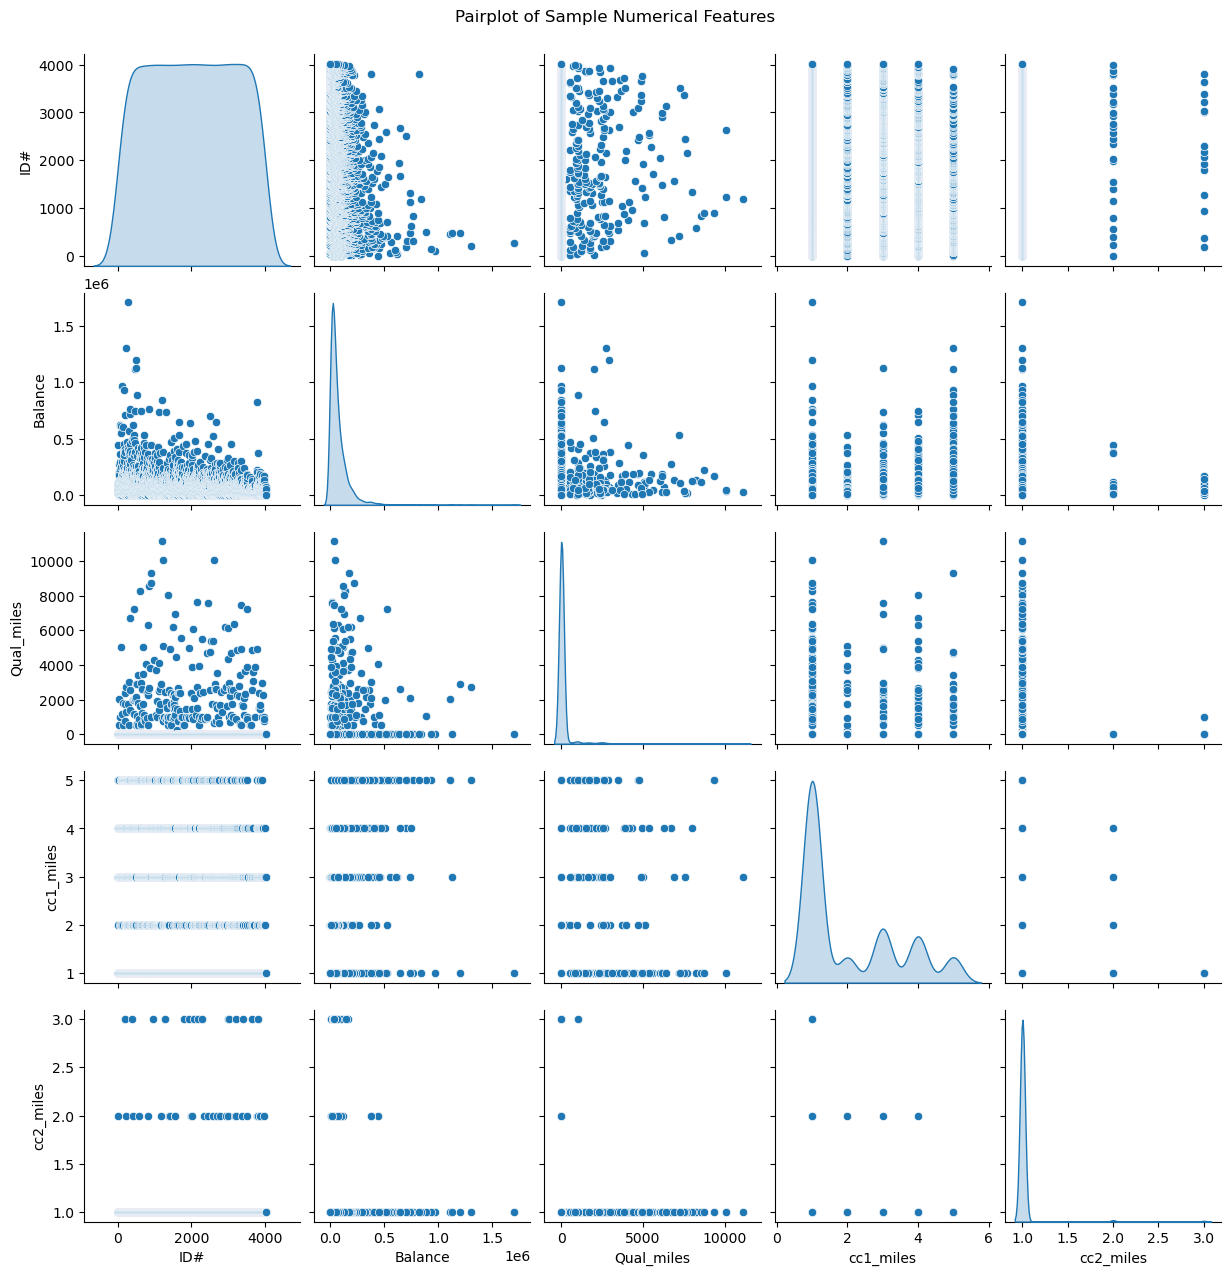

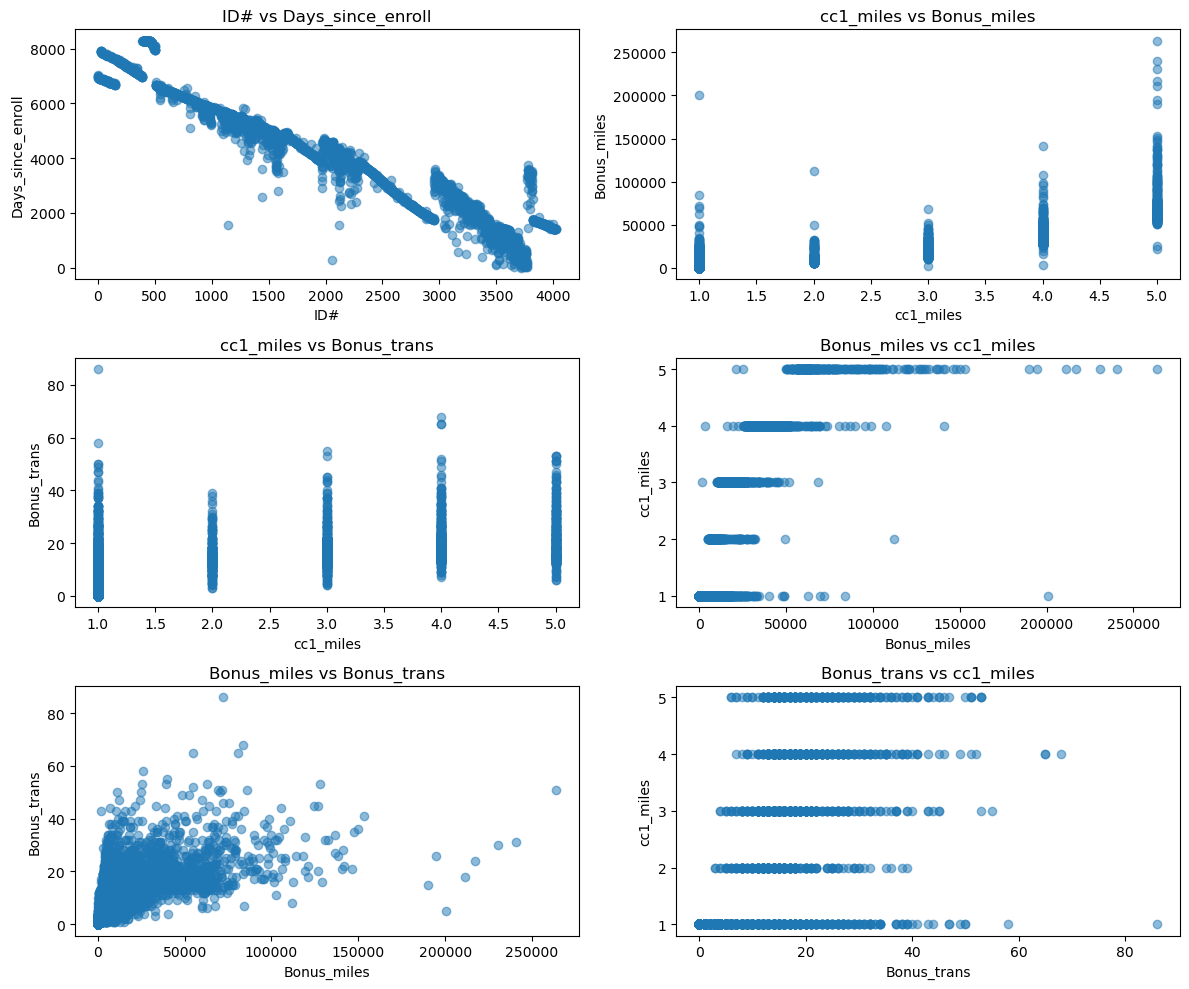

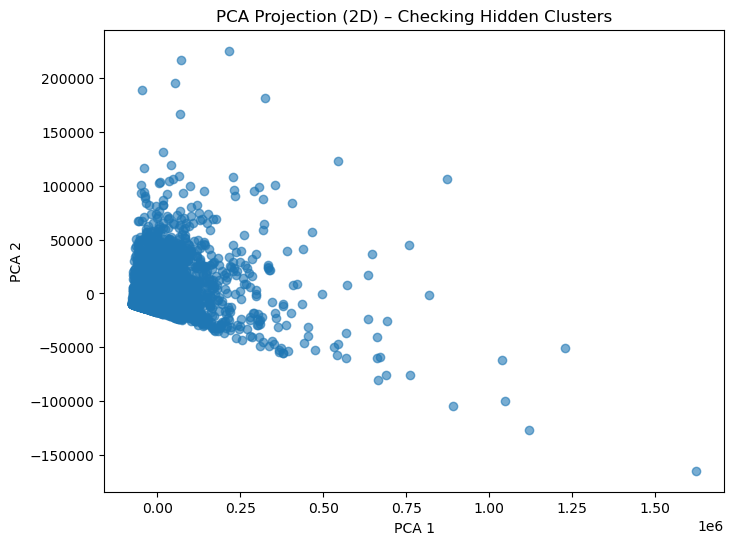

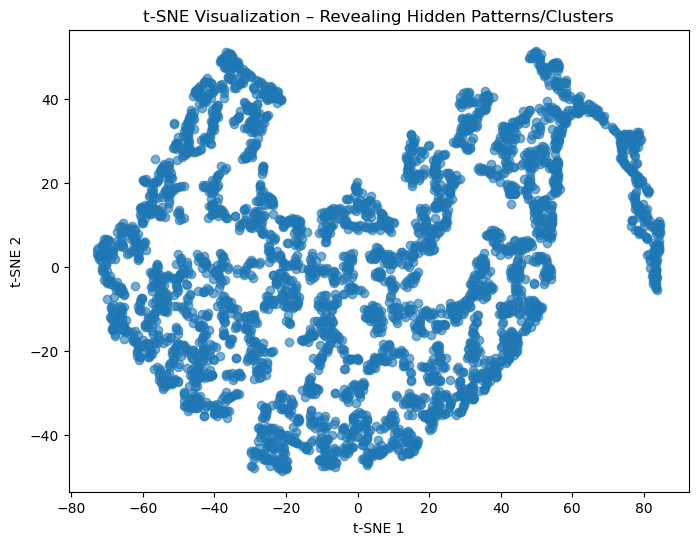

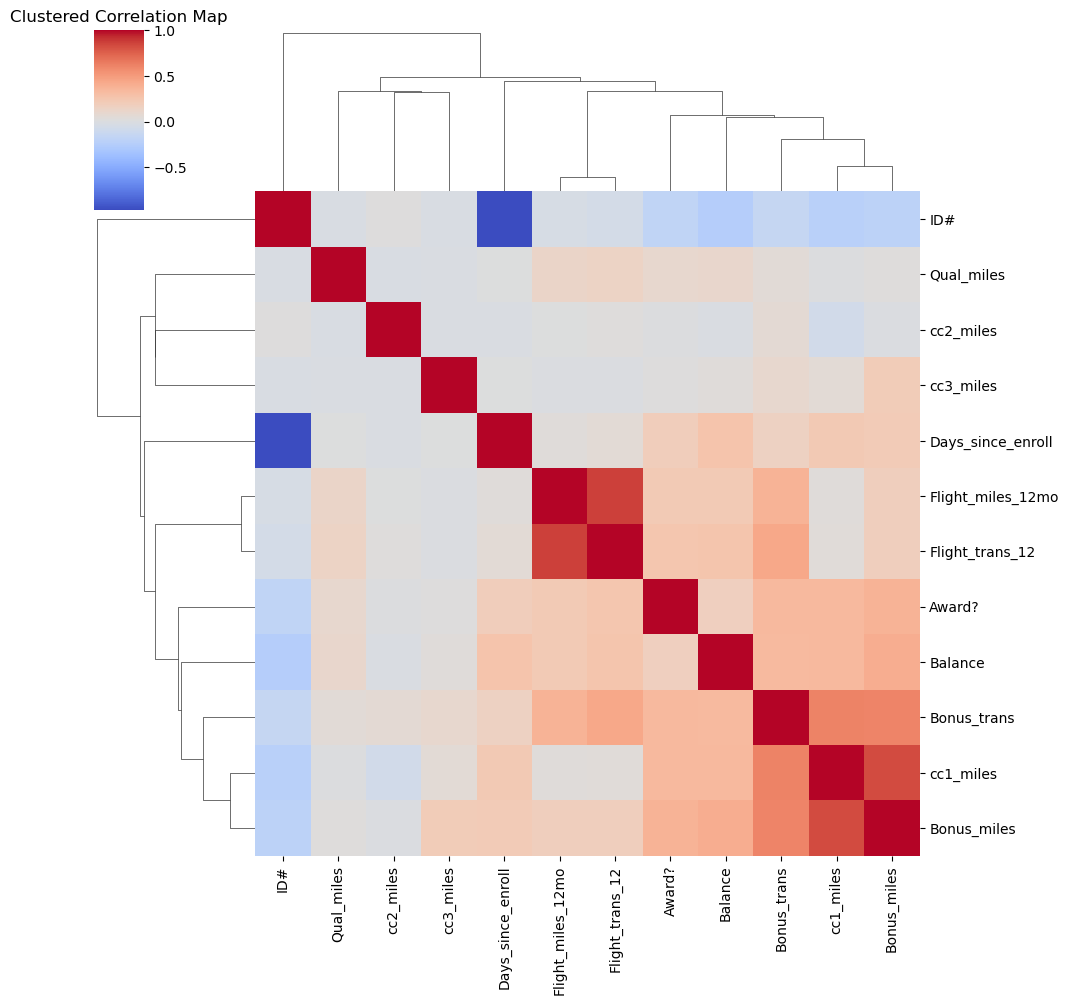

In [33]:
# 3.	Use multiple visualizations to understand the hidden patterns in the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load dataset (sheet = "data")

df=pd.read_excel("C:\\Users\\moulika\\Downloads\\EastWestAirlines.xlsx",sheet_name="data")

# Select numeric features only
numeric_cols = df.select_dtypes(include=np.number).columns
df_num = df[numeric_cols].fillna(df[numeric_cols].median())

# 1. Histogram + KDE for each feature

df_num.plot(kind="density", subplots=True, layout=(5,5), figsize=(15,15), sharex=False)
plt.suptitle("Density Plots (KDE) for Features", fontsize=16)
plt.show()

df_num.hist(bins=20, figsize=(15,15))
plt.suptitle("Histograms of All Numeric Features", fontsize=16)
plt.show()

# 2. Boxplots for Outlier Detection

plt.figure(figsize=(15,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df_num[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


# 4. Pairplot (Shows natural clusters & relationships)

sample_cols = numeric_cols[:5]  # Avoid overload if many columns
sns.pairplot(df[sample_cols], diag_kind='kde')
plt.suptitle("Pairplot of Sample Numerical Features", y=1.02)
plt.show()


# 5. Scatterplot Matrix of Highly Correlated Pairs

corr = df_num.corr().abs()
high_corr = np.where((corr > 0.6) & (corr < 1.0))
pairs = list(zip(high_corr[0], high_corr[1]))

plt.figure(figsize=(12,10))
for idx, (i, j) in enumerate(pairs[:6]):  # first 6 strong relationships
    plt.subplot(3, 2, idx+1)
    plt.scatter(df_num.iloc[:, i], df_num.iloc[:, j], alpha=0.5)
    plt.xlabel(df_num.columns[i])
    plt.ylabel(df_num.columns[j])
    plt.title(f"{df_num.columns[i]} vs {df_num.columns[j]}")
plt.tight_layout()
plt.show()


# 6. PCA Visualization (2 Components)

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_num)

plt.figure(figsize=(8,6))
plt.scatter(pca_fit[:, 0], pca_fit[:, 1], alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Projection (2D) – Checking Hidden Clusters")
plt.show()


# 7. t-SNE (Best for Revealing Hidden Structure)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(df_num)

plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.6)
plt.title("t-SNE Visualization – Revealing Hidden Patterns/Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


# 8. Feature Relationship Heatmap (Using Clustermap)

sns.clustermap(df_num.corr(), cmap="coolwarm")
plt.title("Clustered Correlation Map")
plt.show()


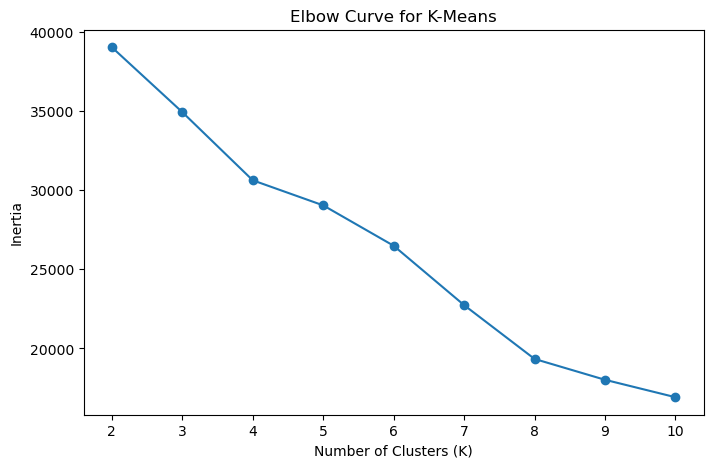

K-Means Silhouette Score: 0.22808887010836637


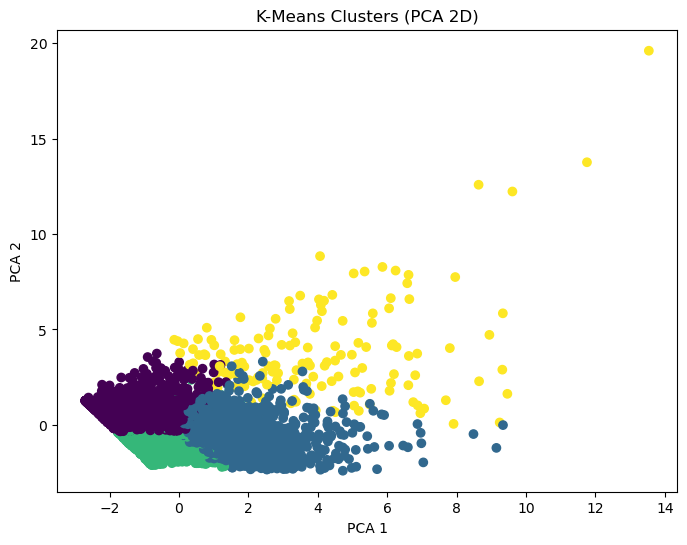

Number of clusters found by DBSCAN: 3
DBSCAN Silhouette Score: 0.2087005926630492


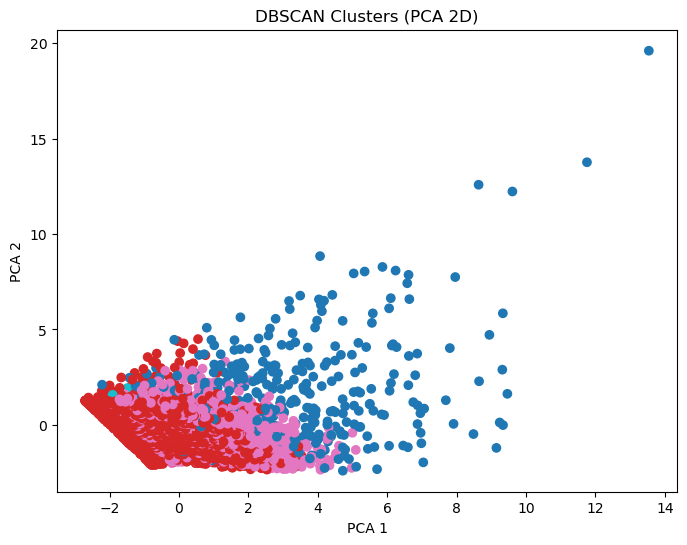

In [34]:
### Implementing Clustering Algorithms:
# Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1. Load dataset

df=pd.read_excel("C:\\Users\\moulika\\Downloads\\EastWestAirlines.xlsx",sheet_name="data")

# Use only numeric features
numeric_cols = df.select_dtypes(include=np.number).columns
data = df[numeric_cols].fillna(df[numeric_cols].median())

# 2. Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. K-Means Clustering
# Elbow Curve
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for K-Means")
plt.show()

# Fit final K-Means (choose K=5 or as per elbow)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Silhouette Score
sil_score_kmeans = silhouette_score(scaled_data, kmeans_labels)
print("K-Means Silhouette Score:", sil_score_kmeans)

df["KMeans_Cluster"] = kmeans_labels

# 4. Visualize K-Means Clusters (PCA 2D)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap="viridis")
plt.title("K-Means Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# 5. DBSCAN Clustering

# Try a few common values — adjust as needed
dbscan = DBSCAN(eps=1.5, min_samples=8)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Count clusters found (-1 means noise)
clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters found by DBSCAN:", clusters)

# Silhouette Score (valid only if >1 clusters)
if clusters > 1:
    sil_score_db = silhouette_score(scaled_data, dbscan_labels)
    print("DBSCAN Silhouette Score:", sil_score_db)
else:
    print("Silhouette score not possible: only one or zero clusters detected.")

df["DBSCAN_Cluster"] = dbscan_labels

# 6. Visualize DBSCAN Clusters (PCA 2D)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=dbscan_labels, cmap="tab10")
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


C:\Users\moulika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans Silhouette: 0.3439806460955019


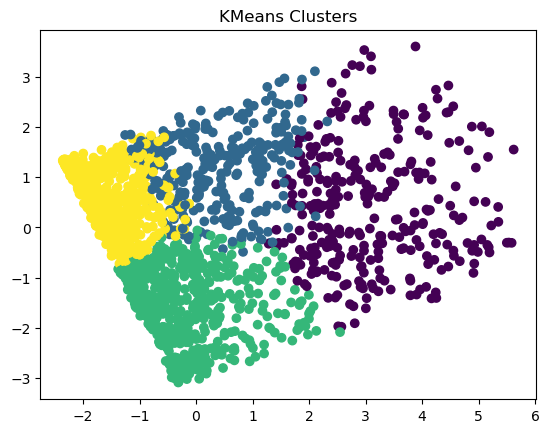

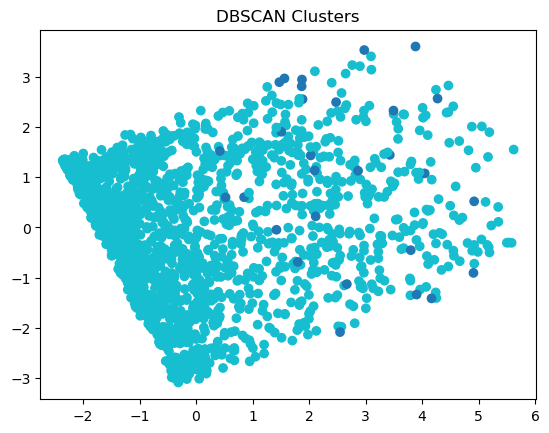

In [35]:
# Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- Load ---
df = pd.read_excel("C:\\Users\\moulika\\Downloads\\EastWestAirlines.xlsx", sheet_name="data")
df = df.fillna(df.median(numeric_only=True))

# --- Remove Outliers ---
def iqr_remove(df):
    num = df.select_dtypes(include=np.number).columns
    for c in num:
        Q1, Q3 = df[c].quantile(0.25), df[c].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[c] >= Q1 - 1.5*IQR) & (df[c] <= Q3 + 1.5*IQR)]
    return df

df = iqr_remove(df)

# --- Scale ---
num_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
data = scaler.fit_transform(df[num_cols])

# --- KMeans ---
kmeans = KMeans(n_clusters=4, random_state=42)
km_labels = kmeans.fit_predict(data)
print("KMeans Silhouette:", silhouette_score(data, km_labels))

# --- DBSCAN ---
db = DBSCAN(eps=1.3, min_samples=8)
db_labels = db.fit_predict(data)

# --- PCA Visualization ---
pca = PCA(n_components=2)
p = pca.fit_transform(data)

plt.scatter(p[:,0], p[:,1], c=km_labels, cmap="viridis")
plt.title("KMeans Clusters")
plt.show()

plt.scatter(p[:,0], p[:,1], c=db_labels, cmap="tab10")
plt.title("DBSCAN Clusters")
plt.show()

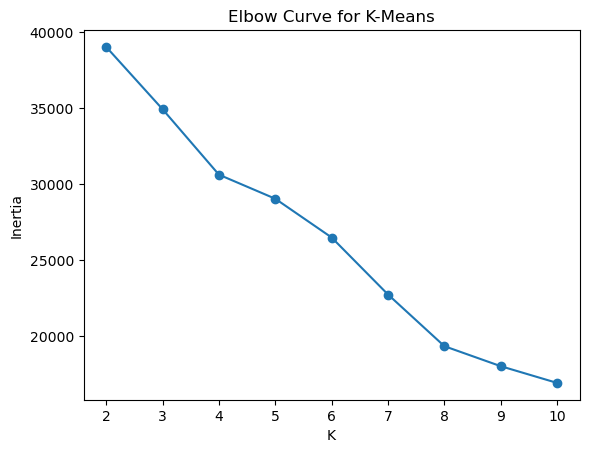

Silhouette Scores for K-Means:
K=2: Silhouette Score=0.2985
K=3: Silhouette Score=0.2019
K=4: Silhouette Score=0.2281
K=5: Silhouette Score=0.2208
K=6: Silhouette Score=0.2326
K=7: Silhouette Score=0.2506
K=8: Silhouette Score=0.2532
K=9: Silhouette Score=0.2576
K=10: Silhouette Score=0.2619

DBSCAN Parameter Testing:
eps=0.5, min_samples=4 → Clusters=34, Silhouette=-0.3357
eps=0.5, min_samples=6 → Clusters=19, Silhouette=-0.1809
eps=0.5, min_samples=8 → Clusters=14, Silhouette=-0.1880
eps=0.5, min_samples=10 → Clusters=12, Silhouette=-0.2950
eps=0.8, min_samples=4 → Clusters=14, Silhouette=-0.1615
eps=0.8, min_samples=6 → Clusters=7, Silhouette=0.0061
eps=0.8, min_samples=8 → Clusters=5, Silhouette=0.0584
eps=0.8, min_samples=10 → Clusters=4, Silhouette=0.0711
eps=1.0, min_samples=4 → Clusters=10, Silhouette=-0.0545
eps=1.0, min_samples=6 → Clusters=6, Silhouette=0.0960
eps=1.0, min_samples=8 → Clusters=3, Silhouette=0.1763
eps=1.0, min_samples=10 → Clusters=2, Silhouette=0.1756
eps=1

In [36]:
# Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load & preprocess

df = pd.read_excel("C:\\Users\\moulika\\Downloads\\EastWestAirlines.xlsx", sheet_name="data")
df = df.fillna(df.median(numeric_only=True))

num_cols = df.select_dtypes(include=np.number).columns
data = StandardScaler().fit_transform(df[num_cols])

# EXPERIMENT WITH K-MEANS PARAMETERS

K_range = range(2, 11)
inertia = []
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(data)
    
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(data, labels))

# ---- Elbow Curve ----
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Curve for K-Means")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

# ---- Silhouette Scores for Different K ----
print("Silhouette Scores for K-Means:")
for k, s in zip(K_range, sil_scores):
    print(f"K={k}: Silhouette Score={s:.4f}")

# EXPERIMENT WITH DBSCAN PARAMETERS

eps_values = [0.5, 0.8, 1.0, 1.3, 1.5, 2.0]
min_samples_values = [4, 6, 8, 10]

print("\nDBSCAN Parameter Testing:")
for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(data)

        clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if clusters > 1:
            sil = silhouette_score(data, labels)
            print(f"eps={eps}, min_samples={ms} → Clusters={clusters}, Silhouette={sil:.4f}")
        else:
            print(f"eps={eps}, min_samples={ms} → Clusters={clusters}, Silhouette=Not valid")

In [37]:
### Cluster Analysis and Interpretation:
# Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Keep feature names BEFORE scaling
data = df.drop(columns=["ID#"])
feature_names = data.columns

# --------------------------------------
# SCALE DATA
# --------------------------------------
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

# --------------------------------------
# K-MEANS CLUSTERING
# --------------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled)
df["KMeans_Cluster"] = kmeans_labels

kmeans_sil = silhouette_score(scaled, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_sil)

# Correct centroid DataFrame
kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)

print("\nK-Means Centroids:\n")
print(kmeans_centroids)


# --------------------------------------
# DBSCAN CLUSTERING
# --------------------------------------
dbscan = DBSCAN(eps=1.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled)

df["DBSCAN_Cluster"] = dbscan_labels

print("\nDBSCAN Clusters Found:", set(dbscan_labels))

# K-MEANS CLUSTER INTERPRETATION

print("       K-MEANS CLUSTER ANALYSIS")

cluster_summary = df.groupby("KMeans_Cluster")[feature_names].mean()
print("\nCluster Summary:\n", cluster_summary)

print("\nK-Means Cluster Interpretation:")

for cluster_id, centroid in kmeans_centroids.iterrows():
    print(f"\n--- Cluster {cluster_id} ---")

    if centroid["Balance"] > kmeans_centroids["Balance"].mean():
        print(" High balance customers.")
    else:
        print(" Low–moderate balance customers.")

    if centroid["Bonus_miles"] > kmeans_centroids["Bonus_miles"].mean():
        print(" Earn many bonus miles (high rewards usage).")

    if centroid["Flight_miles_12mo"] > kmeans_centroids["Flight_miles_12mo"].mean():
        print(" Active recent flyers.")
    else:
        print(" Low recent flying activity.")

    if centroid["Days_since_enroll"] > kmeans_centroids["Days_since_enroll"].mean():
        print(" Long-term loyal members.")
    else:
        print(" New or less loyal members.")

# DBSCAN CLUSTER INTERPRETATION

print("       DBSCAN CLUSTER ANALYSIS")

noise = df[df["DBSCAN_Cluster"] == -1]
core = df[df["DBSCAN_Cluster"] != -1]

print("\nDBSCAN Cluster Summary:\n")
print(core.groupby("DBSCAN_Cluster")[feature_names].mean())

print("\nDBSCAN Cluster Interpretation:")

for cluster_id in sorted(df["DBSCAN_Cluster"].unique()):
    if cluster_id == -1:
        print("\n--- Cluster -1 (Noise / Outliers) ---")
        print(" Customers with unusual/extreme behavior patterns.")
        continue

    cluster_mean = core.groupby("DBSCAN_Cluster").mean().loc[cluster_id]

    print(f"\n--- Cluster {cluster_id} ---")

    if cluster_mean["Balance"] > core["Balance"].mean():
        print(" High balance / high-value customers.")
    else:
        print(" Low/medium balance customers.")

    if cluster_mean["Flight_miles_12mo"] > core["Flight_miles_12mo"].mean():
        print(" Frequent flyers with consistent activity.")
    else:
        print(" Mostly inactive flyers.")

    if cluster_mean["Bonus_miles"] > core["Bonus_miles"].mean():
        print(" High bonus-mile earners (credit card users).")


# FINAL INSIGHTS

print("             FINAL INSIGHTS")

print("\n K-Means created 4 meaningful customer groups:")
print("   High-value frequent flyers")
print("   Low-activity customers")
print("   Medium-usage normal customers")
print("   Bonus-mile-heavy users (not frequent flyers)")

print("\n DBSCAN identified:")
print("   Dense stable behavior groups")
print("   Cluster -1 (outliers) with unusual patterns")

print("\n High-value customers show high balance, bonus miles, and loyalty length.")
print(" Outliers may represent extreme or special-case customers.")
print(" Low fliers could be targeted for reactivation campaigns.")

K-Means Silhouette Score: 0.19071186813310886

K-Means Centroids:

    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1.187834    0.841996   0.087142   0.162282  -0.062767     0.627277   
1  0.481511    0.009838   1.325990  -0.079852   0.159750     1.102684   
2 -0.138024   -0.040567  -0.499254   0.115488  -0.058622    -0.448640   
3 -0.364031   -0.061306  -0.573725  -0.053145  -0.062767    -0.507192   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     1.668953           3.621465         3.912240           0.275809   
1     0.811893          -0.066809        -0.075358           0.319068   
2    -0.327577          -0.143729        -0.149487           0.787578   
3    -0.501074          -0.208705        -0.227878          -0.911480   

     Award?  
0  0.932229  
1  0.657367  
2 -0.153710  
3 -0.453950  

DBSCAN Clusters Found: {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}
       K-MEANS CLUSTER ANALYSIS

Cluster Summary:
   

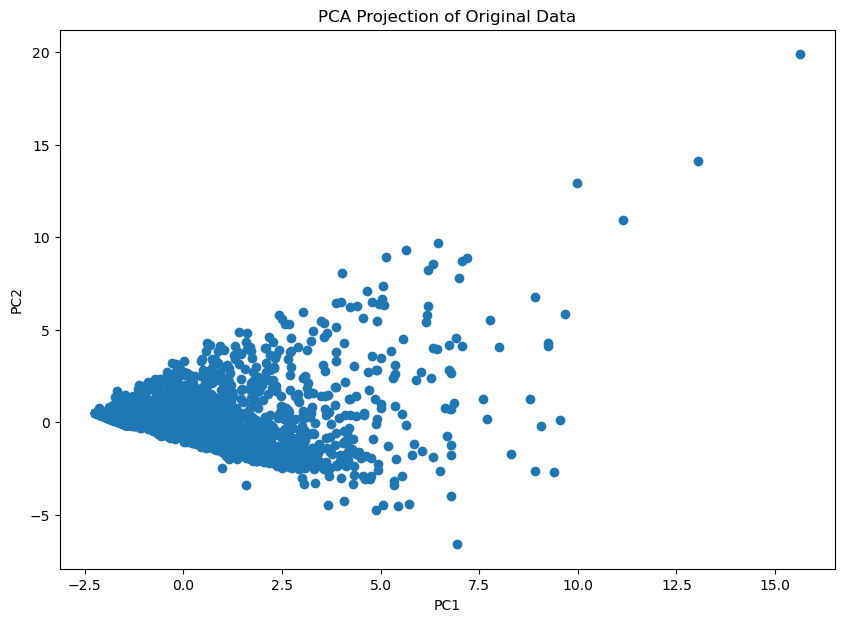

In [38]:
### Visualization:
#  Visualize the clustering results using scatter plots or other suitable visualization techniques.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# REDUCE TO 2 DIMENSIONS FOR PLOTTING

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

plt.figure(figsize=(10,7))
plt.title("PCA Projection of Original Data")
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

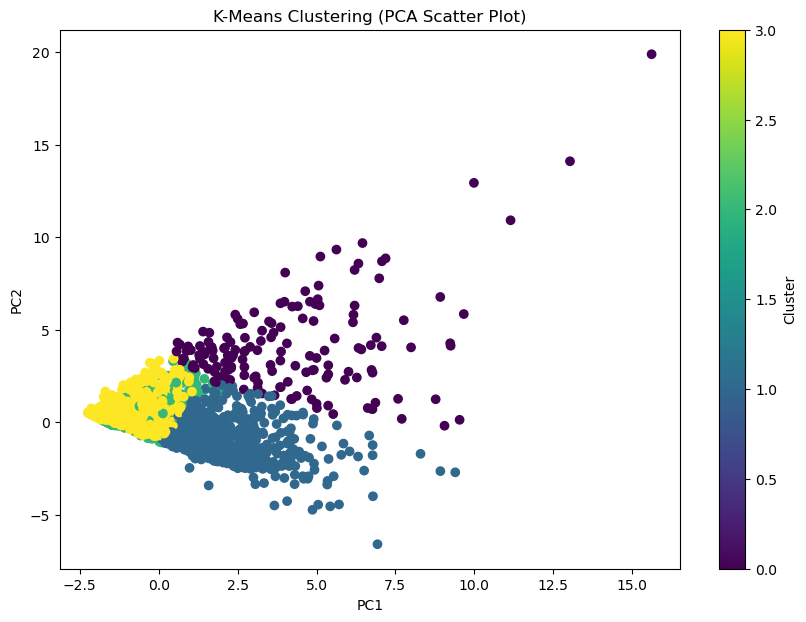

In [39]:
# K-MEANS CLUSTER VISUALIZATION
plt.figure(figsize=(10,7))
plt.title("K-Means Clustering (PCA Scatter Plot)")

plt.scatter(
    pca_data[:, 0], 
    pca_data[:, 1], 
    c=kmeans_labels, 
    cmap="viridis"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

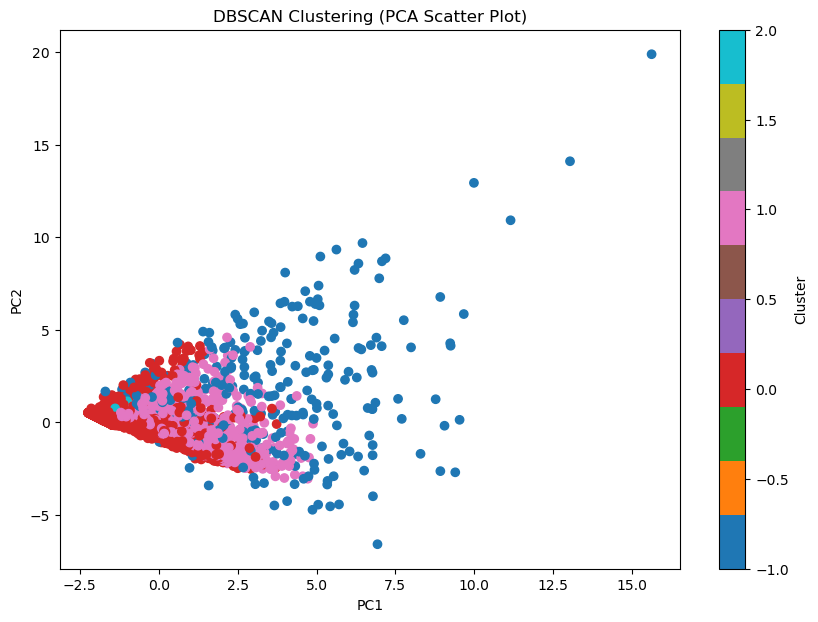

In [40]:
# DBSCAN CLUSTER VISUALIZATION
plt.figure(figsize=(10,7))
plt.title("DBSCAN Clustering (PCA Scatter Plot)")

plt.scatter(
    pca_data[:, 0], 
    pca_data[:, 1], 
    c=dbscan_labels, 
    cmap="tab10"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

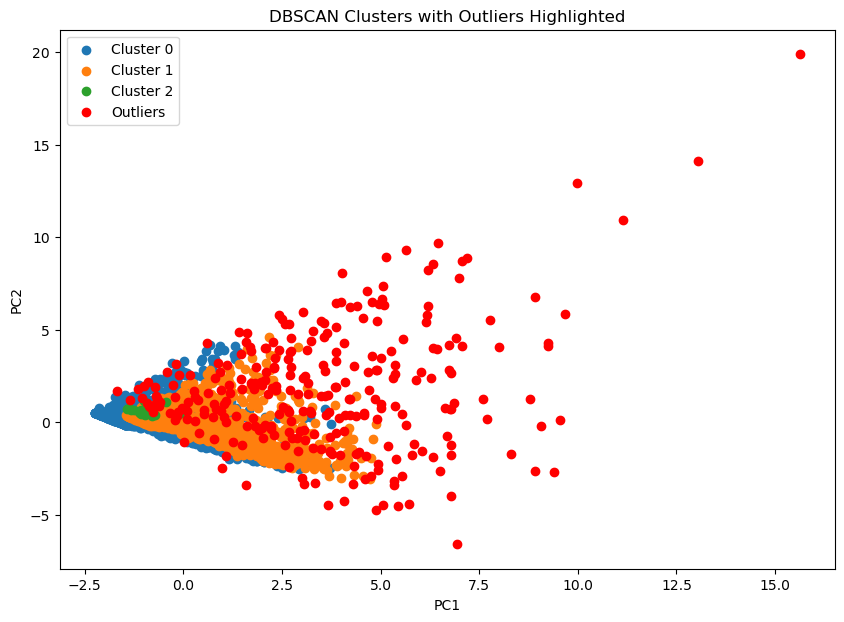

In [41]:
plt.figure(figsize=(10,7))
plt.title("DBSCAN Clusters with Outliers Highlighted")

for label in set(dbscan_labels):
    if label == -1:
        color = "red"
        label_name = "Outliers"
    else:
        color = None
        label_name = f"Cluster {label}"
    
    plt.scatter(
        pca_data[dbscan_labels == label, 0],
        pca_data[dbscan_labels == label, 1],
        label=label_name,
        color=color
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

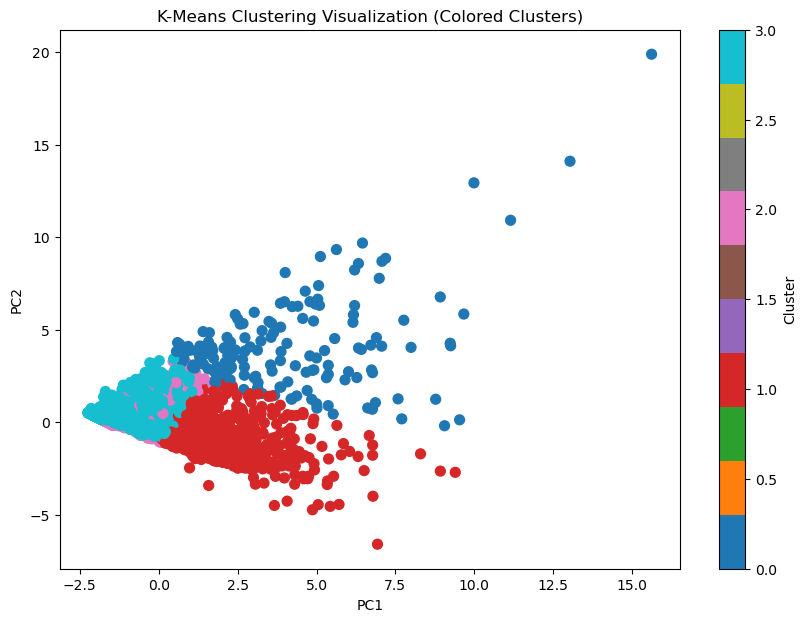

In [42]:
# Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce scaled data to 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

# K-means clusters with different colors

plt.figure(figsize=(10,7))
plt.title("K-Means Clustering Visualization (Colored Clusters)")

plt.scatter(
    pca_data[:, 0], 
    pca_data[:, 1], 
    c=kmeans_labels,          # each cluster gets a unique color
    cmap="tab10",             # qualitative color map
    s=50
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

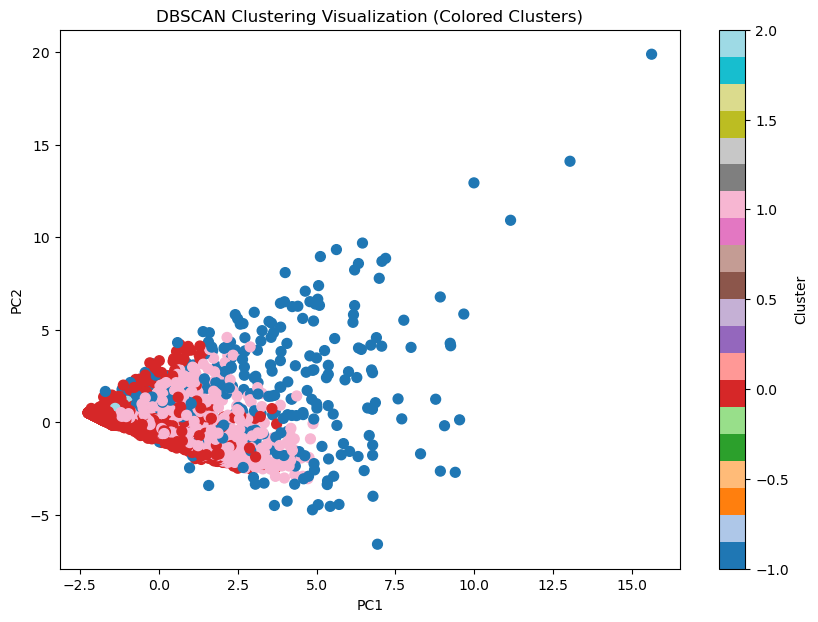

In [43]:
# DBSCAN clusters with different colors

plt.figure(figsize=(10,7))
plt.title("DBSCAN Clustering Visualization (Colored Clusters)")

plt.scatter(
    pca_data[:, 0], 
    pca_data[:, 1], 
    c=dbscan_labels,          # cluster colors (including -1 for noise)
    cmap="tab20",
    s=50
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

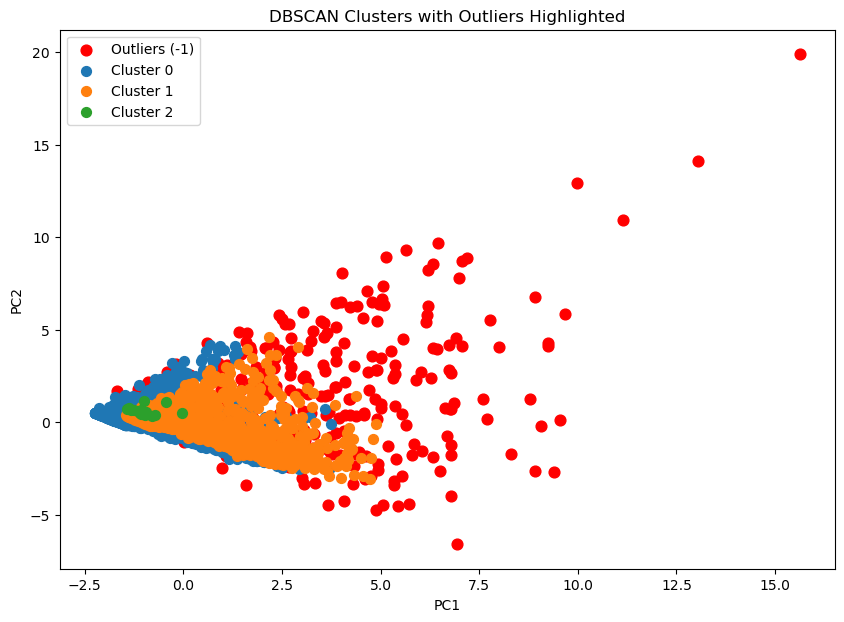

In [44]:
# DBSCAN with outliers highlighted 

plt.figure(figsize=(10,7))
plt.title("DBSCAN Clusters with Outliers Highlighted")

for label in sorted(set(dbscan_labels)):
    if label == -1:  # Noise points
        plt.scatter(
            pca_data[dbscan_labels == label, 0],
            pca_data[dbscan_labels == label, 1],
            c="red",
            label="Outliers (-1)",
            s=60
        )
    else:
        plt.scatter(
            pca_data[dbscan_labels == label, 0],
            pca_data[dbscan_labels == label, 1],
            label=f"Cluster {label}",
            s=50
        )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [45]:
### Evaluation and Performance Metrics:
# Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# K-MEANS EVALUATION

print("      K-MEANS CLUSTER EVALUATION")

kmeans_sil = silhouette_score(scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(scaled, kmeans_labels)
kmeans_ch = calinski_harabasz_score(scaled, kmeans_labels)

print(f"Silhouette Score:          {kmeans_sil:.4f}")
print(f"Davies-Bouldin Index:      {kmeans_db:.4f}")
print(f"Calinski-Harabasz Score:   {kmeans_ch:.4f}")

# DBSCAN EVALUATION

print("      DBSCAN CLUSTER EVALUATION")

# Silhouette only if DBSCAN produced >1 cluster and not all noise
if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    dbscan_sil = silhouette_score(scaled, dbscan_labels)
else:
    dbscan_sil = "Not applicable (noise or single cluster)"

# Davies–Bouldin requires no single cluster case
try:
    dbscan_db = davies_bouldin_score(scaled, dbscan_labels)
except:
    dbscan_db = "Not applicable"

# Calinski–Harabasz cannot run if only 1 cluster
try:
    dbscan_ch = calinski_harabasz_score(scaled, dbscan_labels)
except:
    dbscan_ch = "Not applicable"

print(f"Silhouette Score:          {dbscan_sil}")
print(f"Davies-Bouldin Index:      {dbscan_db}")
print(f"Calinski-Harabasz Score:   {dbscan_ch}")

      K-MEANS CLUSTER EVALUATION
Silhouette Score:          0.1907
Davies-Bouldin Index:      1.6423
Calinski-Harabasz Score:   694.6128
      DBSCAN CLUSTER EVALUATION
Silhouette Score:          Not applicable (noise or single cluster)
Davies-Bouldin Index:      1.7963531555588774
Calinski-Harabasz Score:   440.81644940960695
